In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import Isomap


plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[6,5]

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.data.shape)
print(digits.target)

X, y = digits.data, digits.target

(1797, 8, 8)
(1797, 64)
[0 1 2 ... 8 9 8]


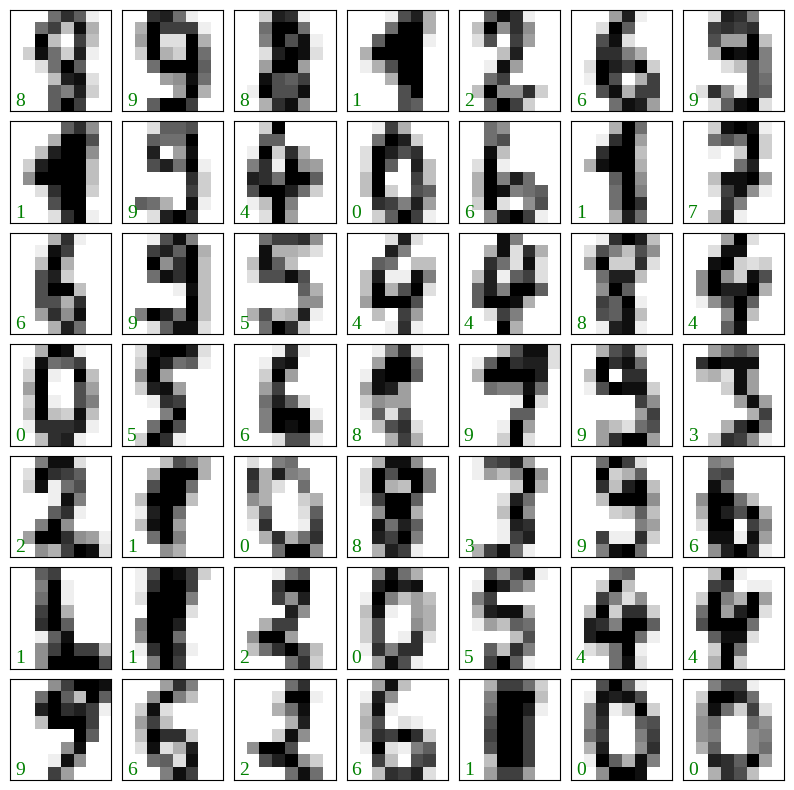

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(4321)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [4]:
isomap = Isomap(n_components=2)
X_reduced = isomap.fit_transform(X)
X_reduced.shape

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

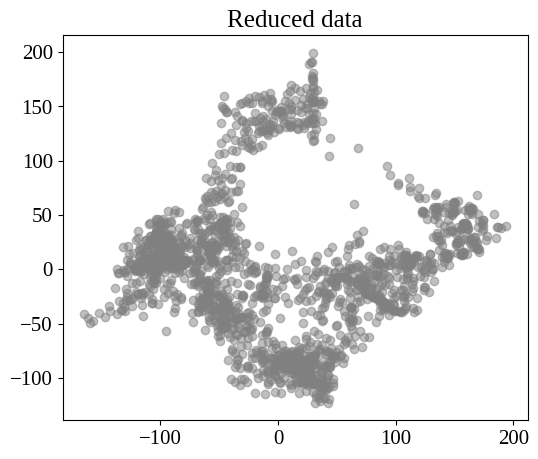

In [5]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='gray', alpha=0.5)
plt.title('Reduced data')
plt.show()

/tmp/ipykernel_4063/623377114.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('Paired',10), alpha=0.5)


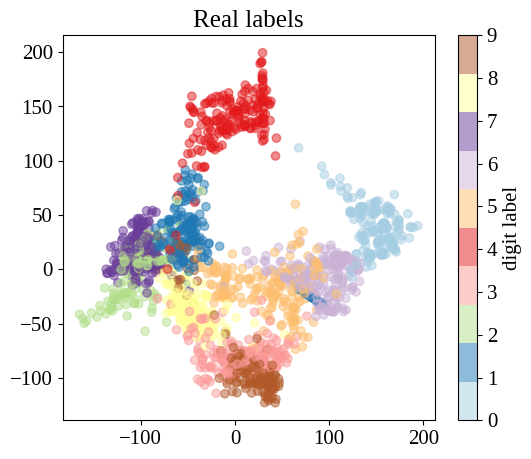

In [6]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('Paired',10), alpha=0.5)
plt.title('Real labels')

plt.colorbar(label='digit label', ticks=range(10))

plt.show()

In [7]:
#try TSNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,learning_rate=200)
X_reduced_1 = tsne.fit_transform(X)

/tmp/ipykernel_4063/1898125895.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced_1[:, 0], X_reduced_1[:, 1], c=y, cmap=plt.cm.get_cmap('Paired',10), alpha=0.5)


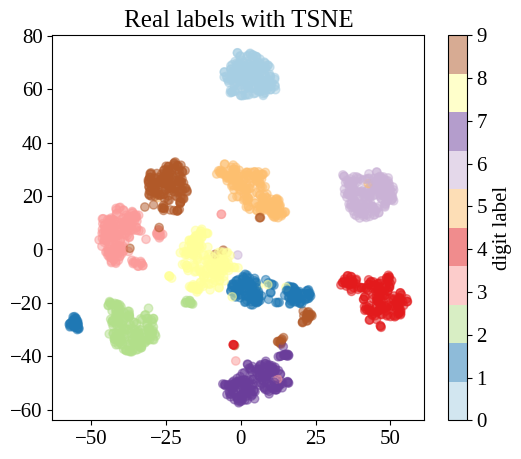

In [8]:
plt.scatter(X_reduced_1[:, 0], X_reduced_1[:, 1], c=y, cmap=plt.cm.get_cmap('Paired',10), alpha=0.5)
plt.title('Real labels with TSNE')

plt.colorbar(label='digit label', ticks=range(10))

plt.show()

In [9]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=2, train_size=0.8)
print(Xtrain.shape, Xtest.shape)

(1437, 64) (360, 64)


In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000, solver='sag')
lr.fit(Xtrain, ytrain)

# predict labels of both trained and tested data
train_pred = lr.predict(Xtrain)
test_pred = lr.predict(Xtest)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_train = accuracy_score(ytrain, train_pred)
accuracy_test = accuracy_score(ytest, test_pred)

print('The accuracy of the training set is:', accuracy_train)
print('The accuracy of the test set is:', accuracy_test)

cm_train = confusion_matrix(ytrain, train_pred)
cm_test = confusion_matrix(ytest, test_pred)

print('\n Confusion matrix of the training set: \n',  cm_train)
print('\n Confusion matrix of the test set: \n',  cm_test)

The accuracy of the training set is: 1.0
The accuracy of the test set is: 0.9444444444444444

 Confusion matrix of the training set: 
 [[146   0   0   0   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0   0   0   0]
 [  0   0 146   0   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   0   0   0]
 [  0   0   0   0 146   0   0   0   0   0]
 [  0   0   0   0   0 139   0   0   0   0]
 [  0   0   0   0   0   0 146   0   0   0]
 [  0   0   0   0   0   0   0 139   0   0]
 [  0   0   0   0   0   0   0   0 138   0]
 [  0   0   0   0   0   0   0   0   0 152]]

 Confusion matrix of the test set: 
 [[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  2  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]


In [12]:
#find the accuracy as a function of the number of dimensions

accuracyTrain_vec=np.empty(63)
accuracyTest_vec=np.empty(63)

for i in range(1,64):
    isomap = Isomap(n_components=i)
    X_reduced = isomap.fit_transform(X)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, random_state=2, train_size=0.8)
    lr = LogisticRegression(max_iter=2000, solver='sag')
    lr.fit(Xtrain, ytrain)
    train_pred = lr.predict(Xtrain)
    test_pred = lr.predict(Xtest)
    accuracyTrain_vec[i-1] = accuracy_score(ytrain, train_pred)
    accuracyTest_vec[i-1] = accuracy_score(ytest, test_pred)

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sale/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/

/home/sale/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sale/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connect

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sale/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficien

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficien

The first number of dimensions with an accuracy greater than 0.95 is:  6


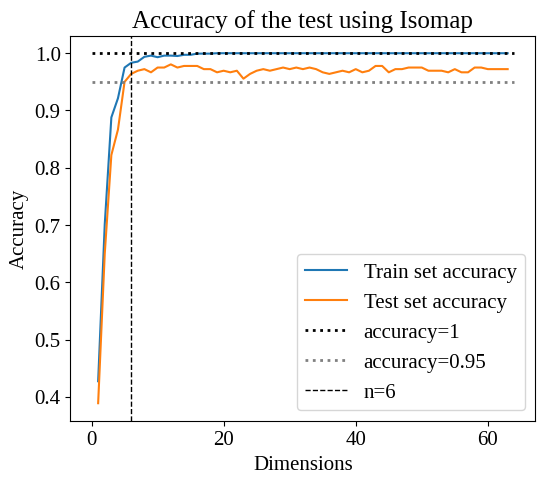

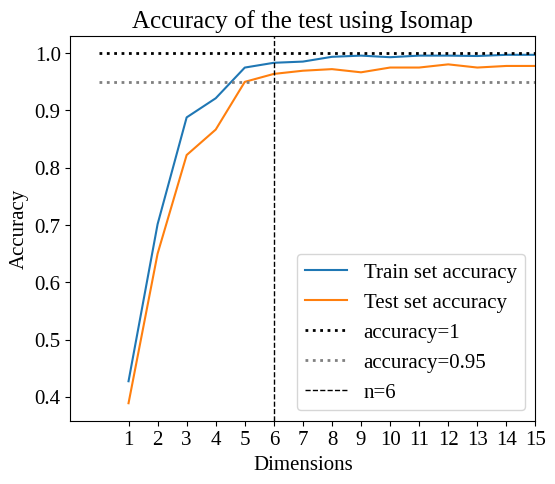

In [17]:
xgrid=np.arange(1,64,1)

treshold=xgrid[accuracyTest_vec>0.95]
treshold=treshold[0]
print('The first number of dimensions with an accuracy greater than 0.95 is: ', treshold)

plt.plot(xgrid, accuracyTrain_vec, label='Train set accuracy')
plt.plot(xgrid, accuracyTest_vec, label='Test set accuracy')
plt.title('Accuracy of the test using Isomap')
plt.hlines(1,0,64, ls='dotted', color='black', lw=2, label='accuracy=1')
plt.hlines(0.95,0,64, ls='dotted', color='grey', lw=2, label='accuracy=0.95')
plt.axvline(treshold, color='black', ls='--', lw=1, label='n=6')
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

plt.plot(xgrid, accuracyTrain_vec, label='Train set accuracy')
plt.plot(xgrid, accuracyTest_vec, label='Test set accuracy')
plt.title('Accuracy of the test using Isomap')
plt.hlines(1,0,15, ls='dotted', color='black', lw=2, label='accuracy=1')
plt.hlines(0.95,0,15, ls='dotted', color='grey', lw=2, label='accuracy=0.95')
plt.xlim(-1,15)
tick=np.arange(1,16,1)
plt.xticks(tick)
plt.axvline(treshold, color='black', ls='--', lw=1, label='n=6')
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [20]:
isomap_test = Isomap(n_components=63)
X_reduced_test = isomap_test.fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced_test, y, random_state=2, train_size=0.8)

lr_test = LogisticRegression(max_iter=2000, solver='sag')
lr_test.fit(Xtrain, ytrain)

# predict labels of both trained and tested data
train_pred_test = lr_test.predict(Xtrain)
test_pred_test = lr_test.predict(Xtest)

accuracy_train_test = accuracy_score(ytrain, train_pred_test)
accuracy_test_test = accuracy_score(ytest, test_pred_test)

print('The accuracy of the training set is:', accuracy_train_test)
print('The accuracy of the test set is:', accuracy_test_test)

cm_train_test = confusion_matrix(ytrain, train_pred_test)
cm_test_test = confusion_matrix(ytest, test_pred_test)

print('\n Confusion matrix of the training set: \n',  cm_train_test)
print('\n Confusion matrix of the test set: \n',  cm_test_test)

/home/sale/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sale/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


The accuracy of the training set is: 1.0
The accuracy of the test set is: 0.9722222222222222

 Confusion matrix of the training set: 
 [[146   0   0   0   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0   0   0   0]
 [  0   0 146   0   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   0   0   0]
 [  0   0   0   0 146   0   0   0   0   0]
 [  0   0   0   0   0 139   0   0   0   0]
 [  0   0   0   0   0   0 146   0   0   0]
 [  0   0   0   0   0   0   0 139   0   0]
 [  0   0   0   0   0   0   0   0 138   0]
 [  0   0   0   0   0   0   0   0   0 152]]

 Confusion matrix of the test set: 
 [[32  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  2  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  0  0]
 [ 0  0  0  0 32  0  0  3  0  0]
 [ 0  0  0  0  0 41  0  0  0  2]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  0 28]]


In [ ]:
#with a dimensionality reduction algorithm we obtain BETTER accuracy!